In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/200k-spotify-songs-light-dataset/light_spotify_dataset.json
/kaggle/input/200k-spotify-songs-light-dataset/light_spotify_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/200k-spotify-songs-light-dataset/light_spotify_dataset.csv')
df

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236983,(Eri Sasaki),Gate Of Steiner,sadness,0.833514,"Unknown,Unknown,Unknown",2018,D min,148,-6.44,No,41,61,41,37,4,14,20,0
236984,(Elena Tsagrinou),El Diablo,love,0.833514,"Unknown,Unknown,Unknown",2021,A min,114,-7.78,No,51,66,66,62,13,84,0,0
236985,(Dima Bilan),Believe,joy,0.833514,"Unknown,Unknown,Unknown",2009,C min,134,-6.72,No,36,73,55,24,5,22,5,0
236986,(Ani Lorak),Shady Lady,joy,0.833514,"Unknown,Unknown,Unknown",2009,F# min,128,-13.00,No,37,70,71,77,5,7,5,0


In [4]:
import pandas as pd

df_json = pd.read_json('/kaggle/input/200k-spotify-songs-light-dataset/light_spotify_dataset.json', lines=True)

print(df.head())


  artist                   song  emotion  variance Genre  Release Date  \
0   ABBA  She's My Kind Of Girl      joy  0.447619   pop          2014   
1   ABBA       Andante, Andante     love  0.202222   pop          1980   
2   ABBA         As Good As New  sadness  0.300881   pop          1979   
3   ABBA                   Bang      joy  0.355000   pop          1975   
4   ABBA       Bang-A-Boomerang      joy  0.355000   pop          1975   

      Key  Tempo  Loudness Explicit  Popularity  Energy  Danceability  \
0   F Maj    128     -6.00       No          31      78            56   
1  A# Maj    102    -10.72       No          59      36            52   
2   E Maj    139     -5.70       No          50      78            85   
3   F Maj    132     -3.00       No          52      76            50   
4   F Maj    132     -3.00       No          52      76            50   

   Positiveness  Speechiness  Liveness  Acousticness  Instrumentalness  
0            60            3        31     

In [5]:
df.describe()

,variance,Release Date,Tempo,Loudness,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
count,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000,236988.000000
mean,0.658932,2008.472826,120.609685,-8.038657,40.003705,62.369166,59.127492,47.656966,11.748042,19.905333,26.156194,5.440052
std,0.320735,14.756158,28.966358,3.842215,18.770245,22.083376,17.069117,23.801800,12.443653,16.551294,29.047331,17.662526
min,-1.000000,1900.000000,33.000000,-46.770000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000
25%,0.833514,2002.000000,97.000000,-9.890000,27.000000,48.000000,48.000000,29.000000,4.000000,10.000000,2.000000,0.000000
50%,0.833514,2015.000000,120.000000,-7.190000,39.000000,64.000000,60.000000,47.000000,6.000000,13.000000,14.000000,0.000000
75%,0.833514,2019.000000,140.000000,-5.370000,52.000000,80.000000,72.000000,66.000000,16.000000,25.000000,44.000000,0.000000
max,1.000000,2024.000000,200.000000,3.740000,100.000000,100.000000,99.000000,99.000000,97.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236988 entries, 0 to 236987
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist            236988 non-null  object 
 1   song              236980 non-null  object 
 2   emotion           236988 non-null  object 
 3   variance          236988 non-null  float64
 4   Genre             236988 non-null  object 
 5   Release Date      236988 non-null  int64  
 6   Key               236988 non-null  object 
 7   Tempo             236988 non-null  int64  
 8   Loudness          236988 non-null  float64
 9   Explicit          236988 non-null  object 
 10  Popularity        236988 non-null  int64  
 11  Energy            236988 non-null  int64  
 12  Danceability      236988 non-null  int64  
 13  Positiveness      236988 non-null  int64  
 14  Speechiness       236988 non-null  int64  
 15  Liveness          236988 non-null  int64  
 16  Acousticness      23

In [7]:
df.isna().sum()

artist              0
song                8
emotion             0
variance            0
Genre               0
Release Date        0
Key                 0
Tempo               0
Loudness            0
Explicit            0
Popularity          0
Energy              0
Danceability        0
Positiveness        0
Speechiness         0
Liveness            0
Acousticness        0
Instrumentalness    0
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]


,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
73535,Trippie Redd,NaN,anger,0.833514,rap,2017,G Maj,80,-5.06,Yes,20,75,55,37,6,20,0,0
74758,Touch Amor,NaN,sadness,0.833514,"Unknown,Unknown,Unknown",1986,C Maj,71,-22.89,No,0,6,41,25,4,6,99,5
89267,Tally Hall,NaN,sadness,0.833514,alternative,2005,E Maj,101,-6.68,No,50,78,71,54,28,31,11,0
111099,RATKING,NaN,sadness,0.833514,rap,2018,F Maj,121,-4.41,No,30,90,42,29,5,11,0,0
115664,Pinegrove,NaN,anger,0.833514,alternative,2015,C# min,77,-8.30,No,81,63,55,21,3,8,1,20
122056,OSHUN,NaN,joy,0.833514,"Unknown,Unknown,Unknown",2021,G Maj,180,-6.67,No,0,85,63,6,7,10,0,72
190394,Elevation Worship,NaN,joy,0.833514,"Unknown,Unknown,Unknown",2023,A Maj,127,-6.72,No,77,87,59,46,7,95,2,0
218249,Billie Eilish,NaN,joy,0.833514,pop,2022,C# Maj,101,-11.32,Yes,5,42,66,42,34,17,35,0


In [9]:
df.dropna(inplace = True)
df

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
0,ABBA,She's My Kind Of Girl,joy,0.447619,pop,2014,F Maj,128,-6.00,No,31,78,56,60,3,31,7,0
1,ABBA,"Andante, Andante",love,0.202222,pop,1980,A# Maj,102,-10.72,No,59,36,52,38,2,7,68,0
2,ABBA,As Good As New,sadness,0.300881,pop,1979,E Maj,139,-5.70,No,50,78,85,97,3,8,20,2
3,ABBA,Bang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
4,ABBA,Bang-A-Boomerang,joy,0.355000,pop,1975,F Maj,132,-3.00,No,52,76,50,89,3,32,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236983,(Eri Sasaki),Gate Of Steiner,sadness,0.833514,"Unknown,Unknown,Unknown",2018,D min,148,-6.44,No,41,61,41,37,4,14,20,0
236984,(Elena Tsagrinou),El Diablo,love,0.833514,"Unknown,Unknown,Unknown",2021,A min,114,-7.78,No,51,66,66,62,13,84,0,0
236985,(Dima Bilan),Believe,joy,0.833514,"Unknown,Unknown,Unknown",2009,C min,134,-6.72,No,36,73,55,24,5,22,5,0
236986,(Ani Lorak),Shady Lady,joy,0.833514,"Unknown,Unknown,Unknown",2009,F# min,128,-13.00,No,37,70,71,77,5,7,5,0


In [10]:
df.isna().sum()

artist              0
song                0
emotion             0
variance            0
Genre               0
Release Date        0
Key                 0
Tempo               0
Loudness            0
Explicit            0
Popularity          0
Energy              0
Danceability        0
Positiveness        0
Speechiness         0
Liveness            0
Acousticness        0
Instrumentalness    0
dtype: int64

In [11]:
for i in df.columns:
    print(f'{df[i].value_counts()}')
    print(20*'-')

artist
Genius English Translations                       1604
Lil Wayne                                          753
Juice WRLD                                         647
Chris Brown                                        589
Gucci Mane                                         522
                                                  ... 
Stereo Wall                                          1
Stereo MC's                                          1
Steppes                                              1
Julia Lester                                         1
Juicy J, Kevin Gates, Future & Sage The Gemini       1
Name: count, Length: 30607, dtype: int64
--------------------
song
Home                          126
You                           115
Forever                       111
Intro                         111
Stay                           88
                             ... 
Blue Jeans  White T-Shirts      1
Blue Dahlia                     1
The Patient Ferris Wheel        1
American Slang 

In [12]:
df[df['song'] == 'Home']

,artist,song,emotion,variance,Genre,Release Date,Key,Tempo,Loudness,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness
2256,Cat Stevens,Home,sadness,0.113636,folk,1974,D Maj,84,-12.21,No,20,30,55,50,4,10,79,24
4050,Depeche Mode,Home,joy,0.007265,pop,1997,C# Maj,151,-7.77,No,53,72,47,45,3,8,8,0
4509,Dream Theater,Home,sadness,0.108931,progressive,1999,G Maj,94,-5.18,No,46,93,24,23,11,30,1,0
6229,Foo Fighters,Home,joy,0.062500,alternative,2007,C Maj,106,-14.58,No,53,15,41,11,4,10,82,2
8131,Iggy Pop,Home,joy,0.241306,pop,1990,A Maj,145,-10.54,No,28,88,38,87,4,32,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219614,Bethel Music,Home,sadness,0.833514,"Unknown,Unknown,Unknown",2021,C Maj,145,-8.32,No,55,57,39,17,3,9,27,0
225129,At Peace,Home,sadness,0.833514,"Unknown,Unknown,Unknown",2020,D# Maj,121,-16.01,No,23,8,61,7,4,11,93,63
225669,Aron Wright,Home,sadness,0.833514,"Unknown,Unknown,Unknown",2014,G Maj,144,-10.46,No,33,24,42,38,3,33,88,0
230898,Aftertheparty,Home,anger,0.833514,"Unknown,Unknown,Unknown",2016,C Maj,130,-15.00,Yes,28,28,88,24,11,10,16,0


In [13]:
sorted_artists_df = df['artist'].value_counts(ascending=False).to_frame()
print(sorted_artists_df)


                                                count
artist                                               
Genius English Translations                      1604
Lil Wayne                                         753
Juice WRLD                                        647
Chris Brown                                       589
Gucci Mane                                        522
...                                               ...
Stereo Wall                                         1
Stereo MC's                                         1
Steppes                                             1
Julia Lester                                        1
Juicy J, Kevin Gates, Future & Sage The Gemini      1

[30607 rows x 1 columns]


In [14]:
# Top Ten Artists in Dataset 
top_ten_artists = df['artist'].value_counts().head(11).index
artist_counts = df['artist'].value_counts().head(11).values

print(top_ten_artists)
print(artist_counts)

Index(['Genius English Translations', 'Lil Wayne', 'Juice WRLD', 'Chris Brown',
       'Gucci Mane', 'Drake', 'Kanye West', 'BONES', 'Chief Keef', 'Eminem',
       'The Beatles'],
      dtype='object', name='artist')
[1604  753  647  589  522  513  471  456  453  423  388]


In [15]:
top_releasing_years = df['Release Date'].value_counts().head(3).index
releasing_counts = df['Release Date'].value_counts().head(3).values

print(top_releasing_years)
print(releasing_counts)

Index([2018, 2017, 2019], dtype='int64', name='Release Date')
[17984 17374 16459]


In [16]:
# Top Emotions 
top_five_emotion = df['emotion'].value_counts().head(3).index
emotions_counts = df['emotion'].value_counts().head(3).values
print(top_five_emotion)
print(emotions_counts)

Index(['joy', 'sadness', 'anger'], dtype='object', name='emotion')
[91529 71157 47190]


In [17]:
# Top Genres
top_five_genres = df['Genre'].value_counts().head(6).index
genres_counts = df['Genre'].value_counts().head(6).values
print(top_five_genres)
print(genres_counts)

Index(['Unknown,Unknown,Unknown', 'pop', 'rap', 'alternative', 'hip-hop',
       'rock'],
      dtype='object', name='Genre')
[50016 46882 33202 19047 17317 12956]


In [18]:
explicit_or_no = df['Explicit'].value_counts()
explicit_or_no

Explicit
No     161022
Yes     75958
Name: count, dtype: int64

Text(0, 0.5, 'Songs')

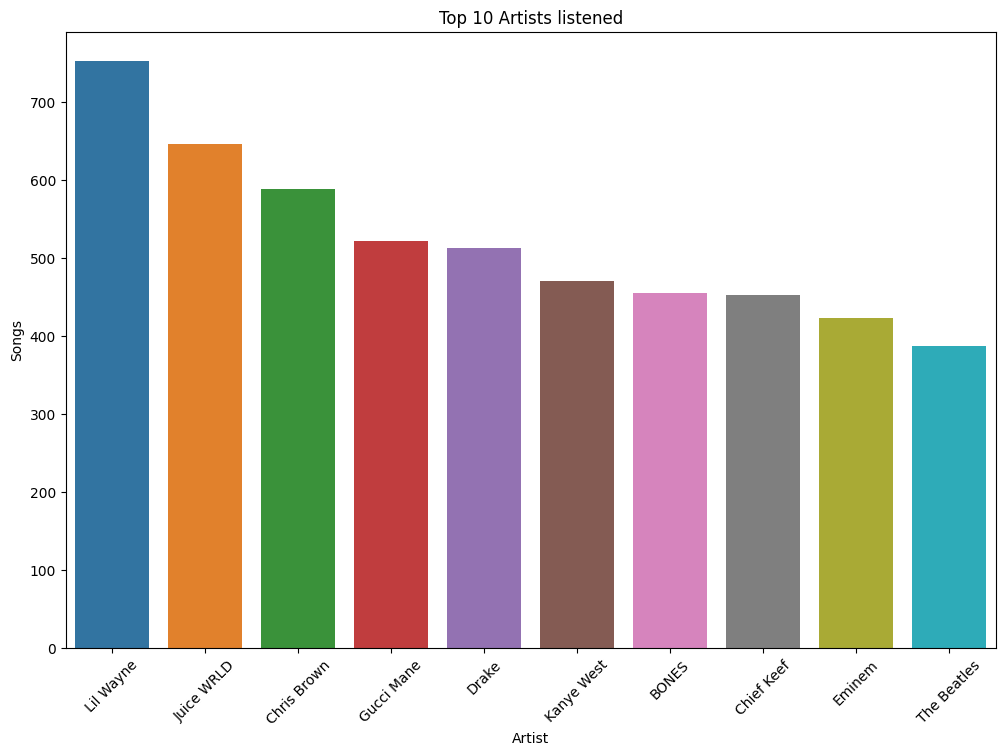

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_ten_artists[1:] , y=artist_counts[1:])
plt.xticks(rotation = 45)
plt.title('Top 10 Artists listened')
plt.xlabel('Artist')
plt.ylabel('Songs')

Text(0, 0.5, 'Songs')

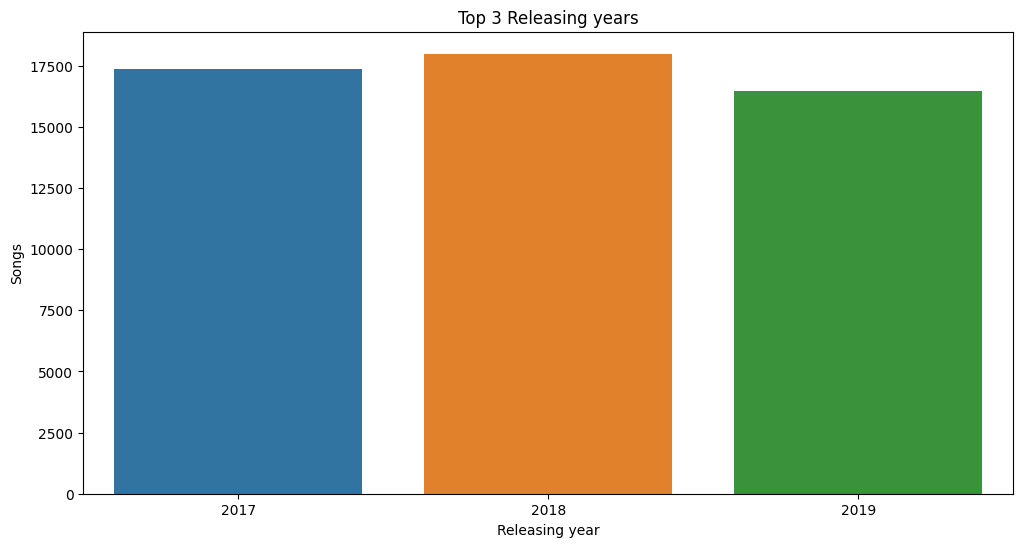

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_releasing_years , y=releasing_counts)
# plt.xticks(rotation = 45)
plt.title('Top 3 Releasing years')
plt.xlabel('Releasing year')
plt.ylabel('Songs')

Text(0, 0.5, 'Songs')

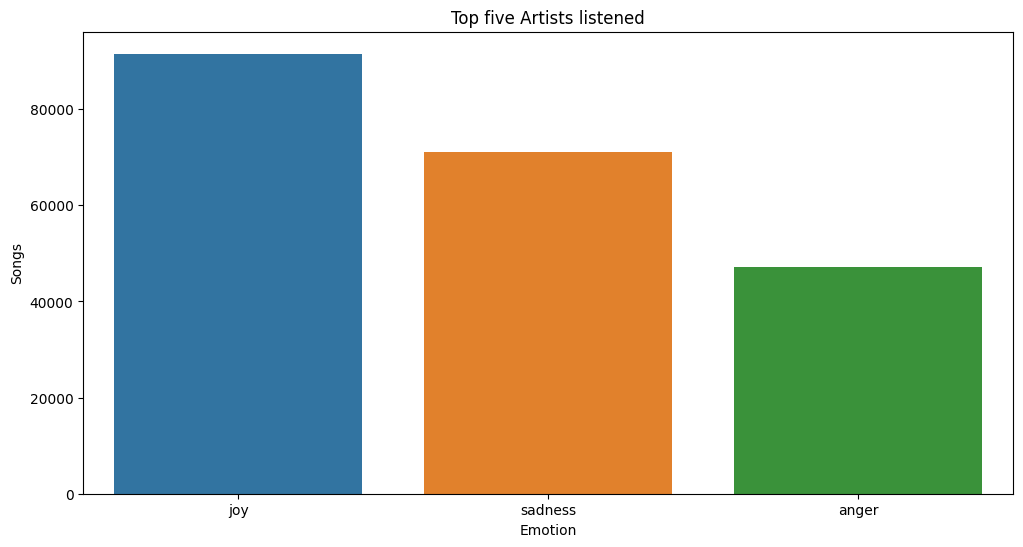

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_five_emotion , y=emotions_counts)
# plt.xticks(rotation = 45)
plt.title('Top five Artists listened')
plt.xlabel('Emotion')
plt.ylabel('Songs')

Text(0, 0.5, 'Songs')

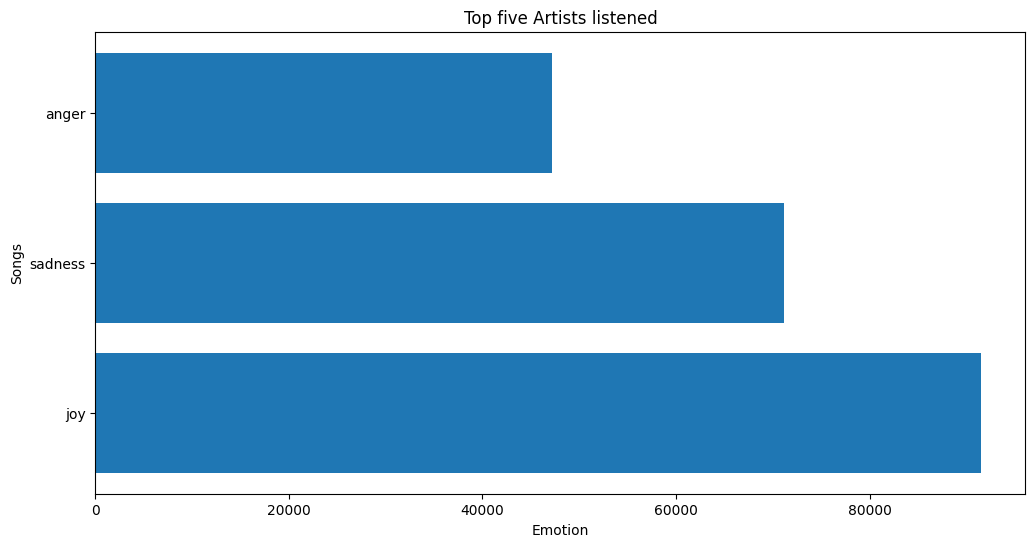

In [22]:
plt.figure(figsize=(12,6))
plt.barh(top_five_emotion , emotions_counts)
# plt.xticks(rotation = 45)
plt.title('Top five Artists listened')
plt.xlabel('Emotion')
plt.ylabel('Songs')

Text(0, 0.5, 'Songs')

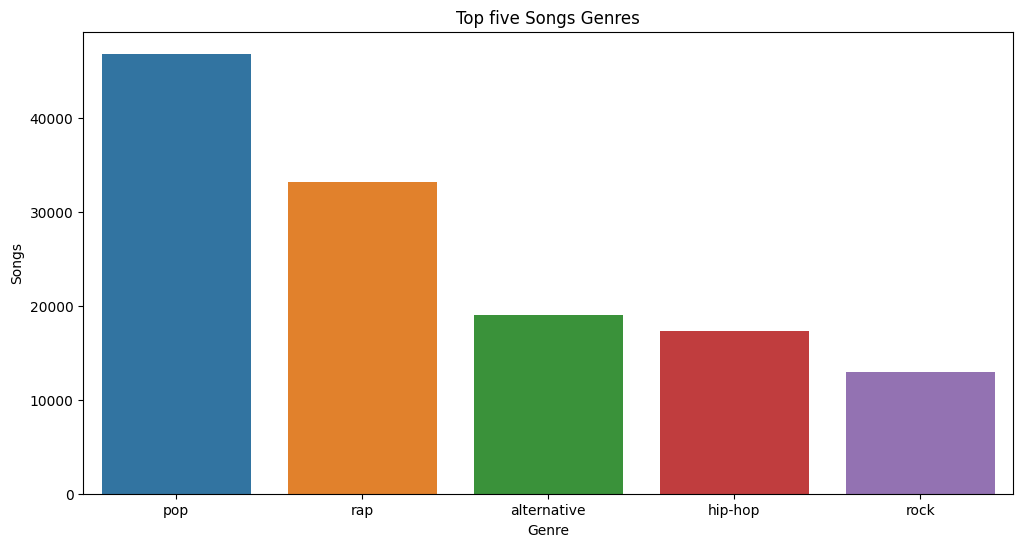

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_five_genres[1:] , y=genres_counts[1:])
# plt.xticks(rotation = 45)
plt.title('Top five Songs Genres')
plt.xlabel('Genre')
plt.ylabel('Songs')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


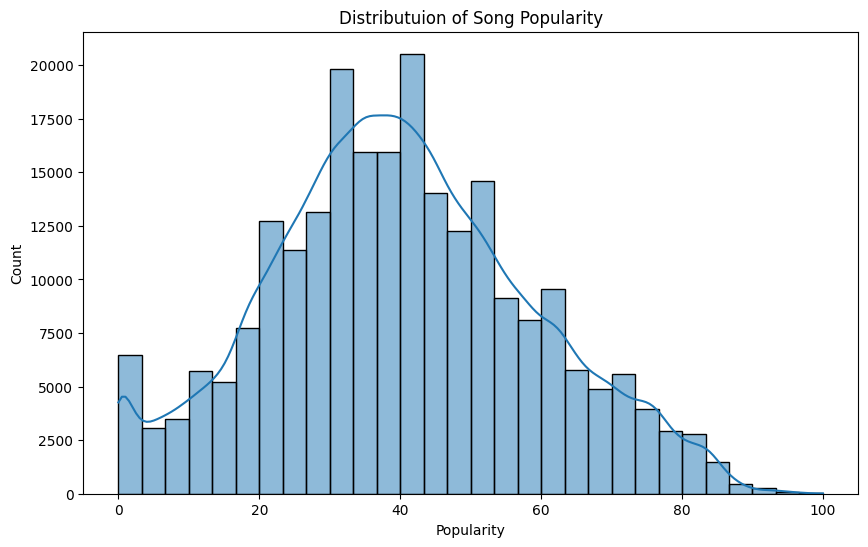

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'],bins=30, kde=True)
plt.title('Distributuion of Song Popularity')
plt.show()

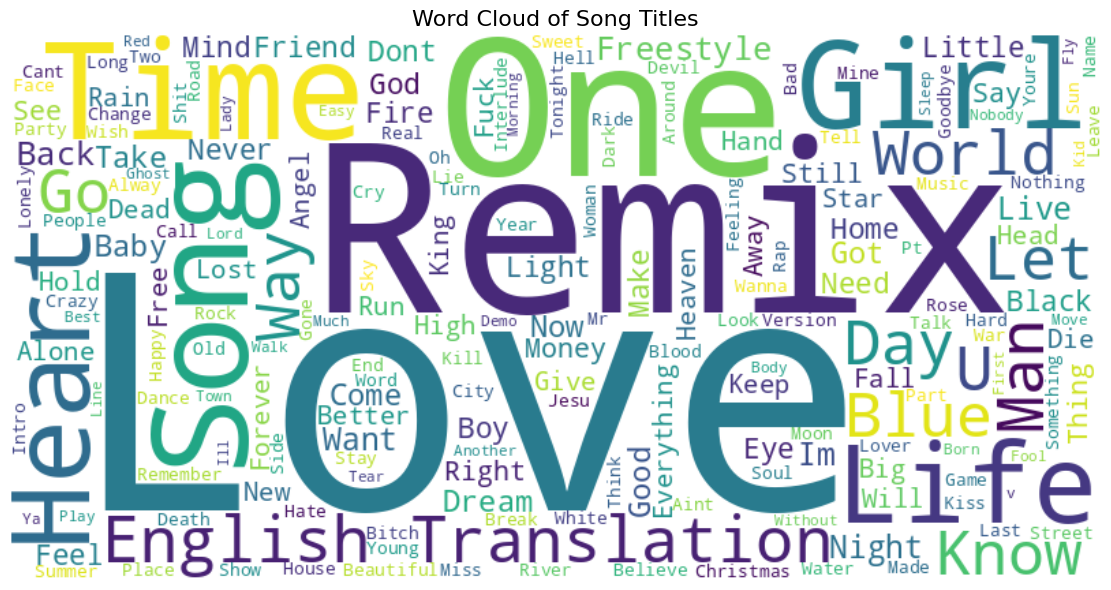

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all song titles into a single string, separated by spaces
text = ' '.join(df['song'].dropna())

# Generate the word cloud
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis',   # Optional: you can choose any matplotlib colormap
    max_words=200          # Optional: limit number of words
).generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Song Titles', fontsize=16)
plt.axis('off')  # Hide axes
plt.tight_layout()
plt.show()
